In [1]:
!pip install emnist

In [2]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [3]:
# Download EMNIST data
from emnist import extract_training_samples, extract_test_samples
train_images, train_labels = extract_training_samples('balanced')
test_images, test_labels = extract_test_samples('balanced')
print(train_images.shape)
print(test_images.shape)

(112800, 28, 28)
(18800, 28, 28)


In [4]:
# Preprocessing
train_images, test_images = train_images / 255.0, test_images / 255.0 # Normalize values to be between 0 and 1
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [5]:
print(train_images.shape)

(112800, 28, 28, 1)


In [6]:
# Class names (47 total)
class_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
              'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
              'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

15


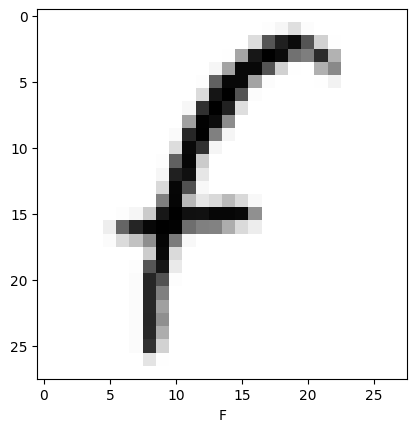

In [7]:
# View a test image and its class
index = 3
plt.imshow(train_images[index] , cmap=plt.cm.binary)
print(train_labels[index])
plt.xlabel(class_name[train_labels[index]])
plt.show()

In [8]:
#CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(48, (5, 5), padding='same', activation='tanh'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation='tanh'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Flatten()),
model.add(layers.Dense(256, activation='tanh')),
model.add(layers.Dense(96, activation='tanh')),
model.add(BatchNormalization())
model.add(layers.Dense(47, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 48)        192       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# About 0.91 accuracy after 10 epochs
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=128,
                    verbose=1,
                    validation_split=0.2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
882/882 [==============================] - 341s 384ms/step - loss: 1.2199 - accuracy: 0.6860 - val_loss: 0.7026 - val_accuracy: 0.7987
Epoch 2/10
882/882 [==============================] - 343s 389ms/step - loss: 0.5587 - accuracy: 0.8331 - val_loss: 0.5184 - val_accuracy: 0.8382
Epoch 3/10
882/882 [==============================] - 341s 386ms/step - loss: 0.4373 - accuracy: 0.8594 - val_loss: 0.4673 - val_accuracy: 0.8488
Epoch 4/10
882/882 [==============================] - 340s 386ms/step - loss: 0.3794 - accuracy: 0.8725 - val_loss: 0.4280 - val_accuracy: 0.8576
Epoch 5/10
882/882 [==============================] - 340s 385ms/step - loss: 0.3437 - accuracy: 0.8817 - val_loss: 0.4162 - val_accuracy: 0.8583
Epoch 6/10
882/882 [==============================] - 337s 382ms/step - loss: 0.3172 - accuracy: 0.8888 - val_loss: 0.3955 - val_accuracy: 0.8618
Epoch 7/10
882/882 [==============================] - 333s 377ms/step - loss: 0.2964 - accuracy: 0.8952 - val_loss: 0.3933 -

In [10]:
# Loading images and processing into format
def load(file):
 image = load_img(file, grayscale=True, target_size=(28, 28))
 image = np.invert(image)
 image = img_to_array(image)
 image = image.reshape(-1, 28, 28, 1)
 image = image.astype('float32') / 255.0
 return image

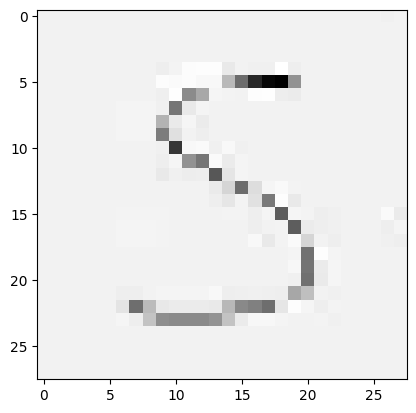

1/1 [==============================] - 0s 23ms/step
28
S


In [14]:
# Predict an image file
image = load('s.png')
plt.imshow(image.reshape(28, 28, 1), cmap = plt.cm.binary)
plt.show()
prediction = model.predict(image)
digit = np.argmax(prediction) # Choose class with highest probability
print(digit)
print(class_name[digit])